In [1]:
import uproot
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [12]:
np.array(number_of_data).sum()

100798

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


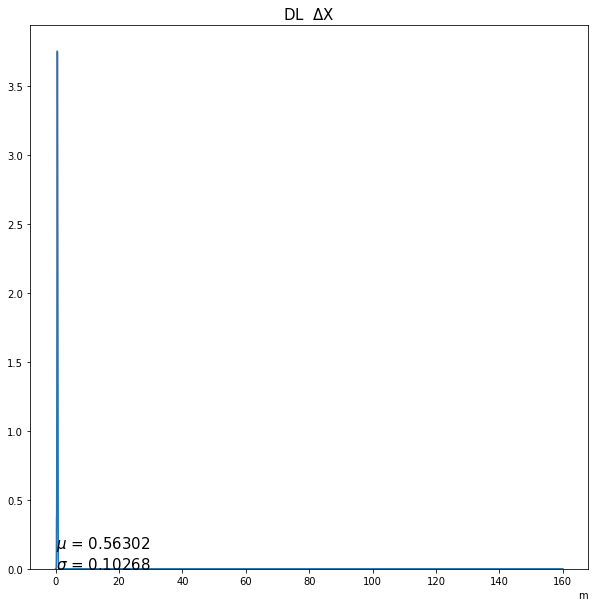

563.0221626975239


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


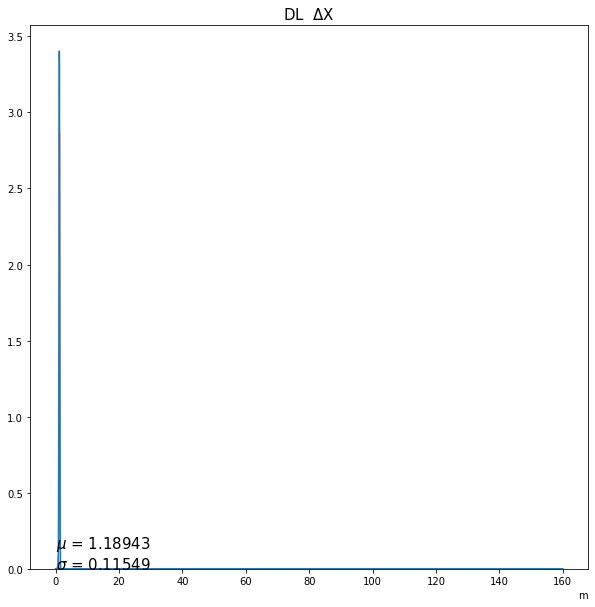

594.7132546988246


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


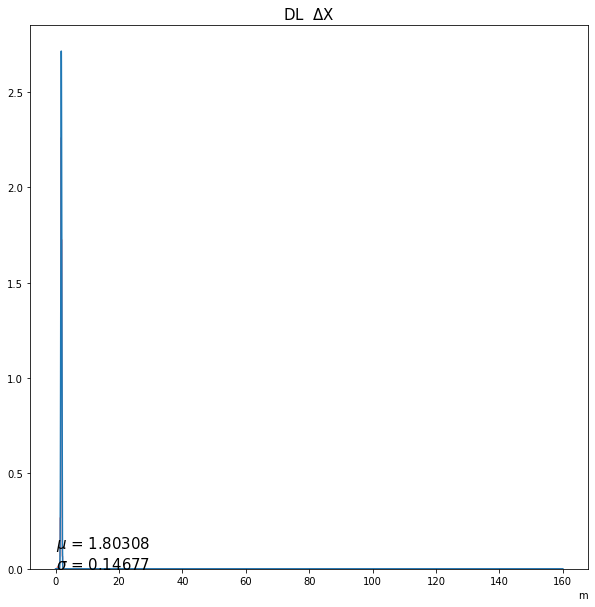

601.0261662717841


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


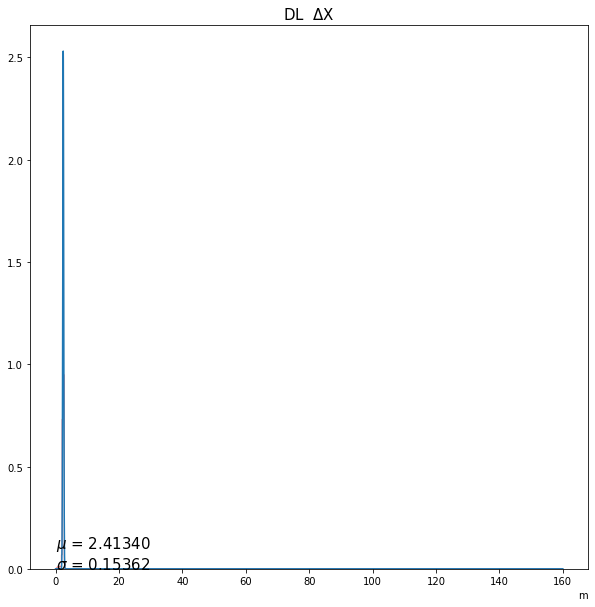

603.3496508038421


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


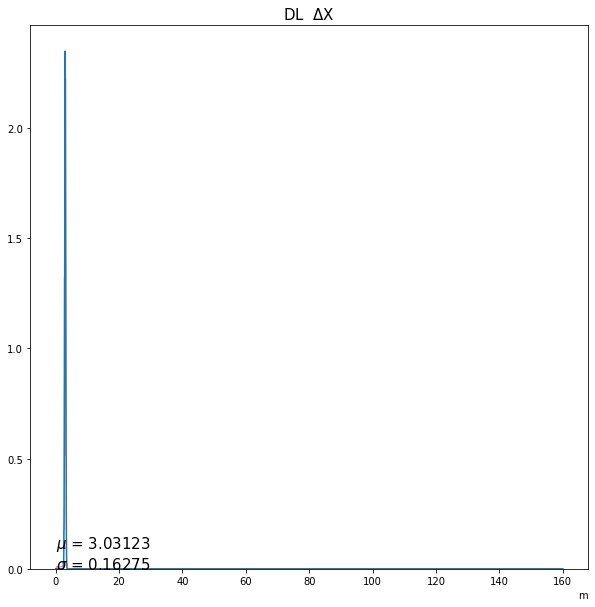

606.245551101448


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


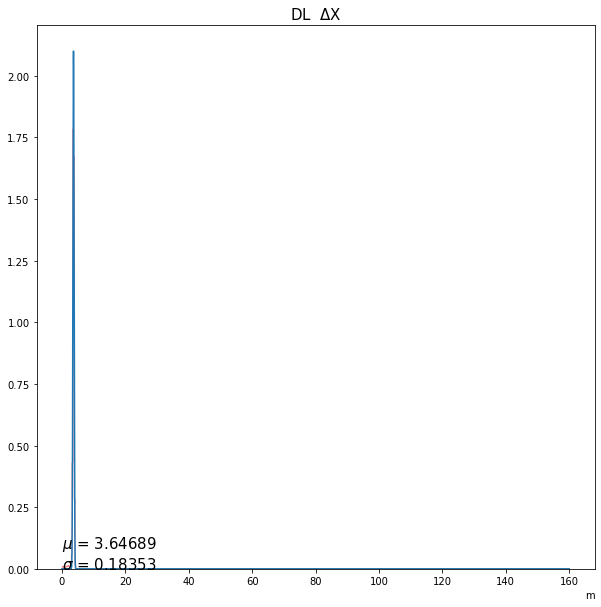

607.8146218430694


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


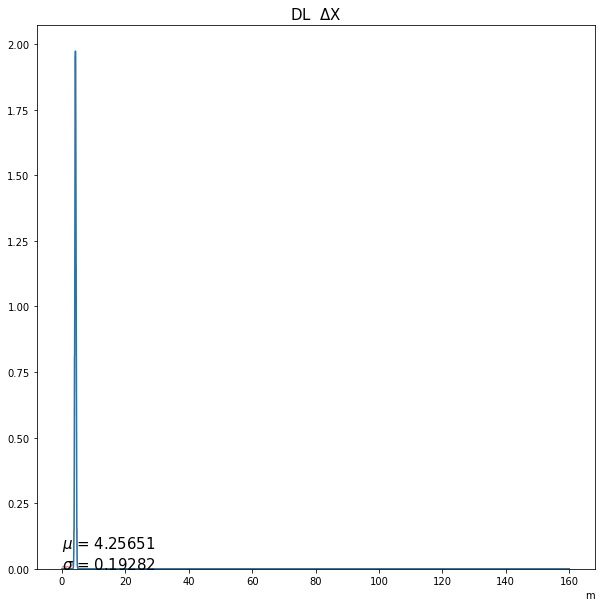

608.0734553337685


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


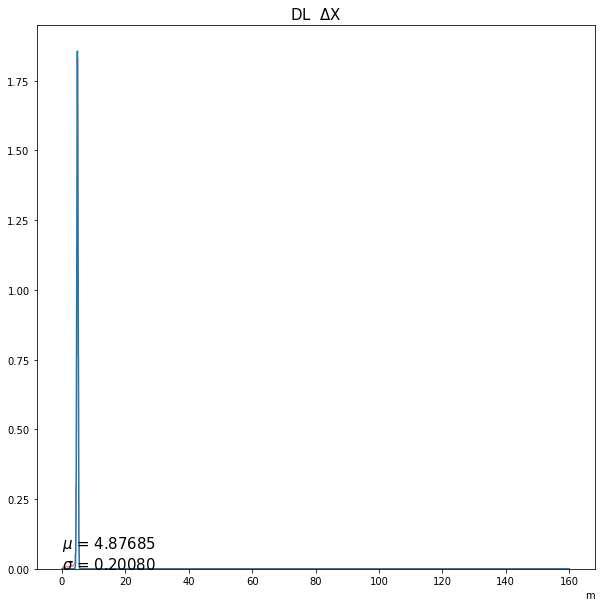

609.6059678993302


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


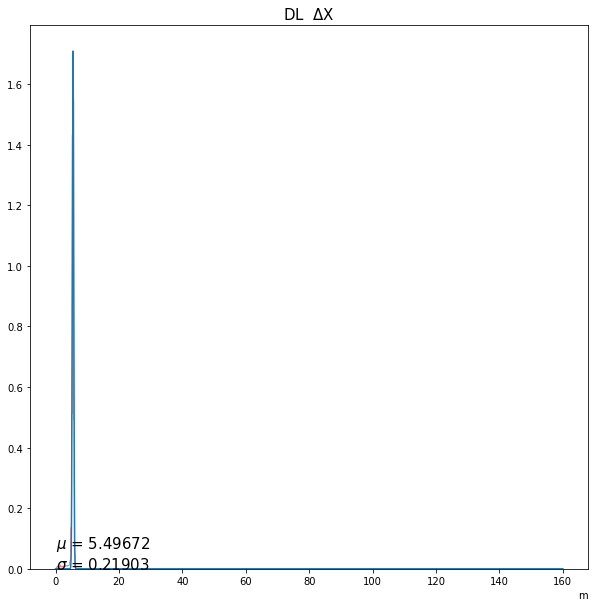

610.7470728682902


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


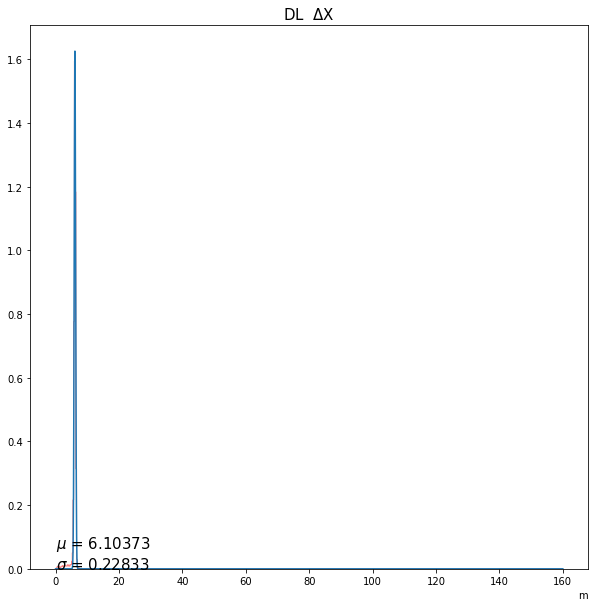

610.372724509755


In [9]:
# energys = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
energys = [1,2,3,4,5,6,7,8,9,10]
factors = []
number_of_data = []
for energy in energys:
    fluxs = []
    bi = 700
    for i in range(101):

        f = uproot.open('/store/hep/users/yewzzang/JSNS2/rat_mc_positron/positron_'+str(energy)+'MeV/jade/reco/Reco_positron_'+str(energy)+'MeV_'+str(i)+'.root')
        flux = np.array(f['recoTriggerTree;1']['recoTrigger/events/events.fluxReco'])

        for j in range(100):
            if flux[j].shape[0] == 1:
                fluxs.append(flux[j][0])
    number_of_data.append(len(fluxs))
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    plt.rcParams['figure.figsize'] = (10, 10)

    tmp_hist = plt.hist(np.array(fluxs)/1000,bins = bi, range = [0,160], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[0.0001,5,1], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev = 2000)
    hist_xx = np.arange(0,160,1/bi)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0,0,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    plt.show()
    factors.append(popt[1]*1000/energy)
    print(popt[1]*1000/energy)

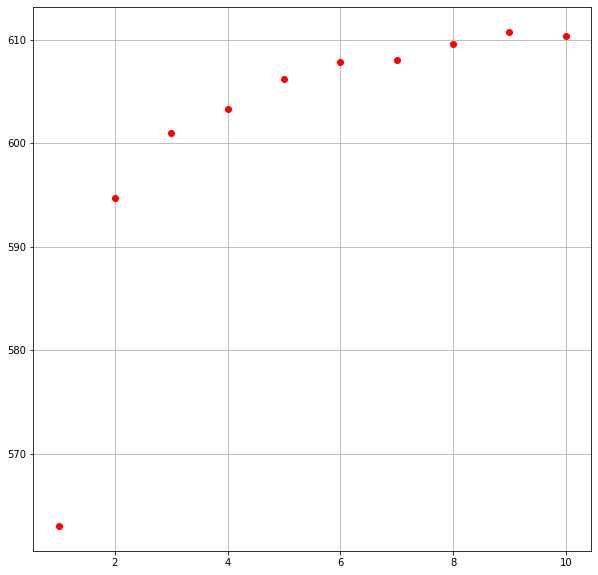

In [3]:
plt.plot(energys,factors,'ro')
plt.grid()

In [4]:
factors

[563.0221626975239,
 594.7132546988246,
 601.0261662717841,
 603.3496508038421,
 606.245551101448,
 607.8146218430694,
 608.0734553337685,
 609.6059678993302,
 610.7470728682902,
 610.372724509755]

In [5]:
# energys = [2]
# factors = []
# for energy in energys:
#     fluxs = []
#     bi = 700
#     for i in range(101):

#         f = uproot.open('/store/hep/users/yewzzang/JSNS2/rat_mc_positron/positron_'+str(energy)+'MeV/jade/reco/Reco_positron_'+str(energy)+'MeV_'+str(i)+'.root')
#         flux = np.array(f['recoTriggerTree;1']['recoTrigger/events/events.fluxReco'])

#         for j in range(100):
#             if flux[j].shape[0] == 1:
#                 fluxs.append(flux[j][0])
#     def gaussian(x, A, mu, sigma):
#         f = A*np.exp(-(x-mu)**2/2./sigma**2)
#         return f
#     plt.rcParams['figure.figsize'] = (10, 10)

#     tmp_hist = plt.hist(np.array(fluxs)/1000,bins = bi, range = [0,160], color= 'r', alpha = 0.5, density = True, histtype = 'step')
#     hist_N = tmp_hist[0]
#     hist_x = []
#     for i in range(len(tmp_hist[1])-1):
#         tmp = tmp_hist[1]
#         hist_x.append((tmp[i] + tmp[i+1])/2.)
#     hist_x = np.array(hist_x)

#     popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[0.0001,5,1], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev = 2000)
#     hist_xx = np.arange(0,160,1/bi)
#     ##A = popt[0]; mu = popt[1]; sigma = popt[2]
#     plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
#     plt.xticks(fontsize = 10)
#     plt.yticks(fontsize = 10)

#     plt.xlabel("m", fontsize=10, loc='right')
#     plt.text(0,0,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
#     plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
#     plt.show()
#     factors.append(popt[1]*1000/energy)
#     print(popt[1]*1000/energy)

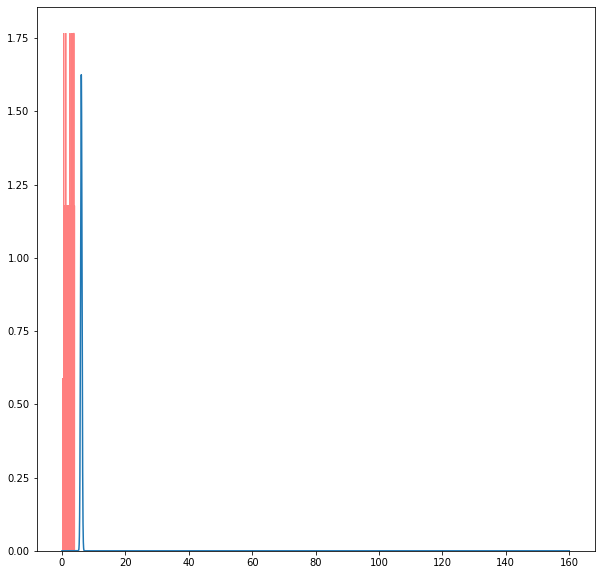

In [6]:
tmp_hist = plt.hist(np.array(fluxs)/1000,bins = bi, range = [0,4], color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
